In [114]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [115]:
# load the dataset
df = pd.read_csv('exampleData.csv')
df.head()

,Average speed,Average distance wall
0,32.473008,86.727505
1,31.140416,85.886254
2,31.277370,76.872820
3,31.981650,88.744627
4,31.886575,80.815665


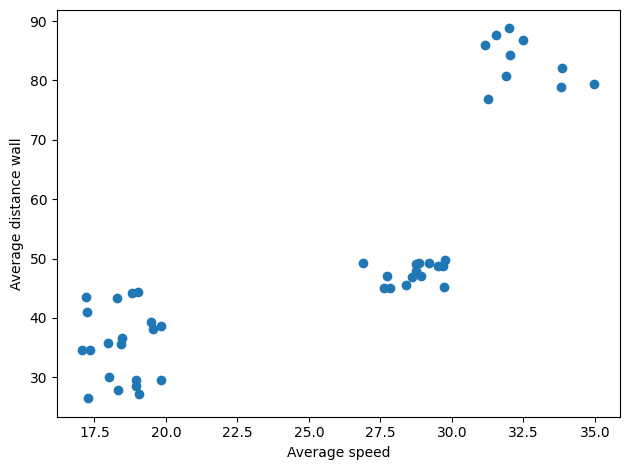

In [116]:
plt.scatter(df['Average speed'], df['Average distance wall'])
plt.xlabel('Average speed')
plt.ylabel('Average distance wall')
plt.tight_layout()

In [117]:
# Finding the k value
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Average speed', 'Average distance wall']])
    sse.append(km.inertia_)

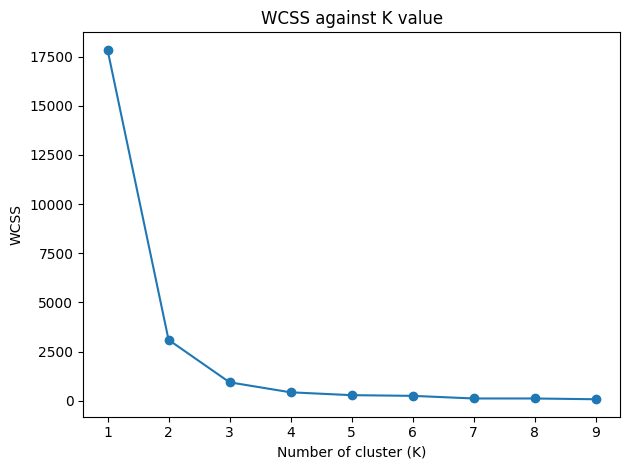

In [118]:
# plot
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of cluster (K)')
plt.ylabel('WCSS')
plt.title('WCSS against K value')
plt.tight_layout()
plt.show()

In [119]:
# Use the cluster to be 3
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Average speed', 'Average distance wall']])
y_predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [120]:
df

,Average speed,Average distance wall
0,32.473008,86.727505
1,31.140416,85.886254
2,31.277370,76.872820
3,31.981650,88.744627
4,31.886575,80.815665
5,34.982871,79.423943
6,32.040986,84.250971
7,33.859470,82.017693
8,33.802683,78.830084
9,31.550047,87.584938


In [121]:
# put the cluster into the dataframe
df['Cluster'] = y_predicted

df

,Average speed,Average distance wall,Cluster
0,32.473008,86.727505,1
1,31.140416,85.886254,1
2,31.277370,76.872820,1
3,31.981650,88.744627,1
4,31.886575,80.815665,1
5,34.982871,79.423943,1
6,32.040986,84.250971,1
7,33.859470,82.017693,1
8,33.802683,78.830084,1
9,31.550047,87.584938,1


In [122]:
# centroid
km.cluster_centers_

array([[28.67872804, 47.58901601],
       [32.49950757, 83.11545013],
       [18.45597469, 35.43722556]])

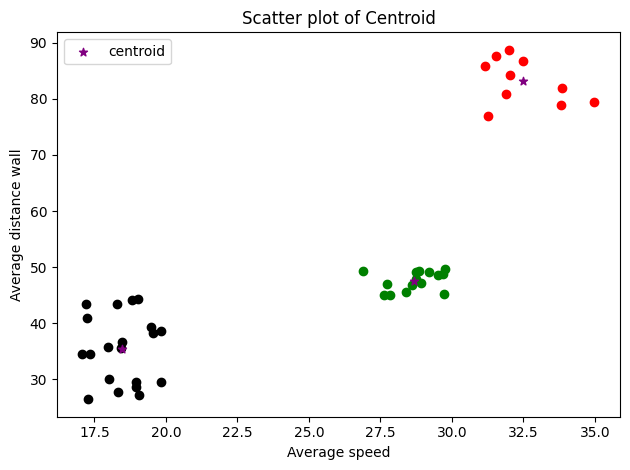

In [123]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['Average speed'], df1['Average distance wall'], color = 'green')
plt.scatter(df2['Average speed'], df2['Average distance wall'], color = 'red')
plt.scatter(df3['Average speed'], df3['Average distance wall'], color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker='*', label = 'centroid')
plt.xlabel('Average speed')
plt.ylabel('Average distance wall')
plt.legend()
plt.title('Scatter plot of Centroid')
plt.tight_layout()